In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
def jit_fo(f):
    return jit(f, forceobj=True)

# Slightly related piece of code illustrating Numba JIT efficiency

In [3]:
@jit
def random_walk_jit(N, step=0.1):
    trajectory = np.zeros((N, 2))
    trajectory[0] = np.random.rand(2)
    for i in range(1, N):
        delta = step*(np.random.rand(2) - 0.5)
        trajectory[i] = trajectory[i - 1] + delta
    return trajectory

def random_walk(N, step=0.1):
    trajectory = np.zeros((N, 2))
    trajectory[0] = np.random.rand(2)
    for i in range(1, N):
        delta = step*(np.random.rand(2) - 0.5)
        trajectory[i] = trajectory[i - 1] + delta
    return trajectory

In [4]:
%%time
random_walk(10_000_000)
print("Done")

Done
CPU times: user 33.7 s, sys: 336 ms, total: 34 s
Wall time: 34.3 s


In [5]:
%%time
random_walk_jit(10_000_000)
print("Done")

Done
CPU times: user 3.67 s, sys: 113 ms, total: 3.78 s
Wall time: 3.87 s


---

This <strong>homework session 2</strong> of <strong>Statistical Mechanics: Algorithms and Computations</strong>  is entirely concerned with the equiprobability principle at the heart  of the hard-disk system and, more generally, of statistical physics.</p><p>The  <strong>session</strong> is divided into<strong> two parts (A, B)</strong>.</p><p>In the <strong>first part</strong>, you <strong>verify</strong> the <strong>equiprobability </strong>principle <strong>directly</strong> for the algorithms <strong> direct_disks_box.py, markov_disks_box.py and event_disks_box.py</strong>. For direct sampling, equiprobability follows from Michael's discussion in Tutorial 2, and for Markov-chain sampling, from <strong>detailed balance</strong>, <strong>aperiodicity</strong> and <strong>irreducibility</strong>.  Nevertheless, it will be useful to check it again.  For molecular  dynamics in contrast, equiprobability is hard to prove: It is the fruit  of divine intuition (L. Boltzmann, 19th century) and of decades of work  in mathematics (Sinai, Simanyi), as explained in lecture 2. So it will  be useful to spend an hour or two to see equiprobability <strong>with our own eyes</strong>, and with our own program, <strong>event_disks_box.py</strong>.</p><p>If in section<strong> A</strong>, you check equiprobability directly but do not reach great precision, you will perform an indirect <strong>high-precision check</strong> of equiprobability in Section <strong>B</strong>. The outcome there will be frankly paradoxical: After having proven equiprobability for all three algorithms in section <strong>A</strong>,  you will see that, YES, all three algorithms are the same but, NO, not  everything is equiprobable.</p><p>What we will touch on in this homework will  become the main theme of week 3 of <strong>Statistical Mechanics: Algorithms and Computations.</strong></p><p>NB: The<strong> equiprobability principle</strong> is a <strong>summit</strong> of Statistical Mechanics. Doing this homework is like climbing <strong>Kilimanjaro</strong>.</p><p>NB2: In Sections <strong>A</strong>,  we use lists (L is a list, it has square brackets []), tuples (conf_a  is a tuple of tuples, with round brackets ()), and dictionaries (hits is  a dictionary, with curly brackets {}). This week, you don't need to  understand all of this precisely. You should just know that these data  types exist. They are the bread and butter of Python.

# Part A: Equiprobability Principle, directly
Using  small boxes $[x - \Delta_{xy}, x + \Delta_{xy}]$, etc,  modify the program  direct_disks_box_multirun.py to show that the probability to sample  configurations a, b, and c are the same (within the numerical  precision), with

In [6]:
A = np.asarray(
    (
        (0.30, 0.30),
        (0.30, 0.70),
        (0.70, 0.30),
        (0.70, 0.70),
    )
)
B = np.asarray(
    (
        (0.20, 0.20),
        (0.20, 0.80),
        (0.75, 0.25),
        (0.75, 0.75),
    )
)
C = np.asarray(
    (
        (0.30, 0.20),
        (0.30, 0.80),
        (0.70, 0.20),
        (0.70, 0.70),
    )
)

## Reference implementation

In [7]:
import random, math

In [8]:
def direct_disks_box(N, sigma):
    condition = False
    while condition == False:
        L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))
            min_dist = min(math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L)
            if min_dist < 2.0 * sigma:
                condition = False
                break
            else:
                L.append(a)
                condition = True
    return np.asarray(L)

In [9]:
%%time
direct_disks_box(4, 0.15)

CPU times: user 73 µs, sys: 0 ns, total: 73 µs
Wall time: 76.1 µs


array([[0.84312569, 0.68506867],
       [0.28572348, 0.68476185],
       [0.52605405, 0.4744522 ],
       [0.24910814, 0.196862  ]])

In [10]:
def run_multi(n_runs=1_000_000, sigma=0.15, del_xy=0.05):
    configurations = {
        "conf_a": A,
        "conf_b": B,
        "conf_c": C,
    }
    hits = {"conf_a": 0, "conf_b": 0, "conf_c": 0}
    samples = np.zeros((n_runs, 4, 2))
    
    for run in range(n_runs):
        x_vec = direct_disks_box(4, sigma)
        samples[run] = np.asarray(x_vec)
        for conf in configurations:
            condition_hit = True
            for b in configurations[conf]:
                condition_b = min(
                    max(
                        abs(a[0] - b[0]),
                        abs(a[1] - b[1])
                    ) for a in x_vec
                ) < del_xy
                condition_hit *= condition_b
            if condition_hit:
                hits[conf] += 1

    for conf in configurations:
        print(conf, hits[conf])
    return samples

In [11]:
for i in range(3):
    print(f"Run {i + 1}")
    run_multi(10, del_xy=0.1)
    print()

Run 1
conf_a 0
conf_b 0
conf_c 0

Run 2
conf_a 1
conf_b 0
conf_c 0

Run 3
conf_a 1
conf_b 0
conf_c 1



## Markov chain implementation

In [38]:
def markov_disks_box_iterator(initial_state, sigma=0.15, delta=0.01):
    L = deepcopy(initial_state)
    yield list(L)
    while True:
        a_index = np.random.randint(4)
        a = L[a_index]
        b = [
            a[0] + random.uniform(-delta, delta),
            a[1] + random.uniform(-delta, delta),
        ]
        min_dist = min(
            pow(b[0] - L[c][0], 2) + pow(b[1] - L[c][1], 2)
            for c in range(4) if c != a_index
        )
        box_cond = min(b[0], b[1]) < sigma or max(b[0], b[1]) > 1.0 - sigma
        if not (box_cond or min_dist < 4.0 * sigma ** 2):
            L[a_index] = b
        yield list(L)  # list(L) freezes the current state

In [44]:
def run_multi_markov(initial_state, n_steps=1_000_000, sigma=0.15, step=0.1, del_xy=0.05):
    configurations = {
        "conf_a": A,
        "conf_b": B,
        "conf_c": C,
    }
    hits = {"conf_a": 0, "conf_b": 0, "conf_c": 0}
    samples = []
    markov_disks_box_generator = markov_disks_box_iterator(
        initial_state,
        sigma,
        step,
    )
    
    for run in range(n_steps):
        x_vec = next(markov_disks_box_generator)
        samples.append(x_vec)
        for conf in configurations:
            condition_hit = True
            for b in configurations[conf]:
                condition_b = min(
                    max(
                        abs(a[0] - b[0]),
                        abs(a[1] - b[1])
                    ) for a in x_vec
                ) < del_xy
                condition_hit *= condition_b
            if condition_hit:
                hits[conf] += 1

    for conf in configurations:
        print(conf, hits[conf])
    return np.asarray(samples)

In [60]:
init_state = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]

In [62]:
for nsteps in [10_000, 100_000, 1_000_000]:
    print(f"{nsteps} steps:")
    for run in range(3):
        print(f"Run #{run + 1}")
        run_multi_markov(
            init_state,
            nsteps,
            sigma=0.15,
            step=0.1,
            del_xy=0.05,
        )
        print(init_state)

10000 steps:
Run #1
conf_a 2
conf_b 0
conf_c 6
[[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
Run #2
conf_a 0
conf_b 0
conf_c 0
[[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
Run #3
conf_a 3
conf_b 3
conf_c 2
[[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
100000 steps:
Run #1
conf_a 18
conf_b 7
conf_c 8
[[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
Run #2
conf_a 2
conf_b 13
conf_c 3
[[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
Run #3
conf_a 6
conf_b 14
conf_c 15
[[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
1000000 steps:
Run #1
conf_a 91
conf_b 95
conf_c 117
[[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
Run #2
conf_a 126
conf_b 118
conf_c 131
[[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
Run #3
conf_a 93
conf_b 99
conf_c 70
[[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]


## Event-based Implementation

In [ ]:
def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = [pos_b[0] - pos_a[0], pos_b[1] - pos_a[1]]
    del_x_sq = del_x[0] ** 2 + del_x[1] ** 2
    del_v = [vel_b[0] - vel_a[0], vel_b[1] - vel_a[1]]
    del_v_sq = del_v[0] ** 2 + del_v[1] ** 2
    scal = del_v[0] * del_x[0] + del_v[1] * del_x[1]
    Upsilon = scal ** 2 - del_v_sq * ( del_x_sq - 4.0 * sigma **2)
    if Upsilon > 0.0 and scal < 0.0:
        del_t = - (scal + math.sqrt(Upsilon)) / del_v_sq
    else:
        del_t = float('inf')
    return del_t

conf_a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70,0.70))
conf_b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75,0.75))
conf_c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70,0.70))
configurations = [conf_a, conf_b, conf_c]
hits = {conf_a: 0, conf_b: 0, conf_c: 0}
del_xy = 0.10
pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]
singles = [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
sigma = 0.10
t = 0.0
n_events = 5000000
for event in range(n_events):
    if event % 100000 == 0:
        print event
    wall_times = [wall_time(pos[k][l], vel[k][l], sigma) for k, l  in singles]
    pair_times = [pair_time(pos[k], vel[k], pos[l], vel[l], sigma) for k, l in pairs]
    next_event = min(wall_times + pair_times)
    t_previous = t
    for inter_times in range(int(t + 1), int(t + next_event + 1)):
        del_t = inter_times - t_previous
        for k, l in singles:
            pos[k][l] += vel[k][l] * del_t
        t_previous = inter_times
        for conf in configurations:
            condition_hit = True
            for b in conf:
                condition_b = min(max(abs(a[0] - b[0]), abs(a[1] - b[1])) for a in pos) < del_xy
                condition_hit *= condition_b
            if condition_hit:
                hits[conf] += 1
    t += next_event
    del_t = t - t_previous
    for k, l in singles:
        pos[k][l] += vel[k][l] * del_t
    if min(wall_times) < min(pair_times):
        collision_disk, direction = singles[wall_times.index(next_event)]
        vel[collision_disk][direction] *= -1.0
    else:
        a, b = pairs[pair_times.index(next_event)]
        del_x = [pos[b][0] - pos[a][0], pos[b][1] - pos[a][1]]
        abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
        e_perp = [c / abs_x for c in del_x]
        del_v = [vel[b][0] - vel[a][0], vel[b][1] - vel[a][1]]
        scal = del_v[0] * e_perp[0] + del_v[1] * e_perp[1]
        for k in range(2):
            vel[a][k] += e_perp[k] * scal
            vel[b][k] -= e_perp[k] * scal

for conf in configurations:
    print conf, hits[conf]

In [72]:
def vec_diff(vec_a, vec_b):
    return map(
        lambda p: p[1] - p[0],
        zip(vec_a, vec_b)
    )

def vec_sq_distance(vec_a, vec_b):
    return sum(
        map(
            lambda x: pow(x, 2),
            vec_diff(vec_a, vec_b)
        )
    )

def dot_product(vec_a, vec_b):
    return sum(
        map(
            lambda p: p[0]*p[1],
            zip(vec_a, vec_b)
        )
    )

In [63]:
def wall_time(pos_a, vel_a, sigma):
    if vel_a > 0.0:
        del_t = (1.0 - sigma - pos_a) / vel_a
    elif vel_a < 0.0:
        del_t = (pos_a - sigma) / abs(vel_a)
    else:
        del_t = float('inf')
    return del_t

In [73]:
def pair_time(pos_a, vel_a, pos_b, vel_b, sigma):
    del_x = vec_diff(pos_a, pos_b)
    del_x_sq = vec_sq_distance(pos_a, pos_b)
    
    del_v = vec_diff(vel_a, vel_b)
    del_v_sq = vec_sq_distance(vel_a, vel_b)
    
    scal = dot_product(del_v, del_x)
    
    Upsilon = pow(scal, 2) - del_v_sq*(del_x_sq - 4.0*pow(sigma, 2))
    if Upsilon > 0.0 and scal < 0.0:
        del_t = -(scal + math.sqrt(Upsilon))/del_v_sq
    else:
        del_t = float('inf')
    return del_t

In [124]:
def run_multi_events(
        n_events,
        positions,
        velocities,
        sigma=0.1,
        del_xy=0.10,
    ):
    conf_a = ((0.30, 0.30), (0.30, 0.70), (0.70, 0.30), (0.70,0.70))
    conf_b = ((0.20, 0.20), (0.20, 0.80), (0.75, 0.25), (0.75,0.75))
    conf_c = ((0.30, 0.20), (0.30, 0.80), (0.70, 0.20), (0.70,0.70))
    configurations = {
        "conf_a": conf_a,
        "conf_b": conf_b,
        "conf_c": conf_c,
    }
    hits = {"conf_a": 0, "conf_b": 0, "conf_c": 0}
    t = .0
    times = []
    singles = [
        (particle, axis)
        for particle in range(4)
        for axis in range(2)
    ]
    pairs = [
        (p1, p2)
        for p1 in range(4)
        for p2 in range(4)
        if p2 > p1
    ]
    
    for event in range(n_events):
        if event % 100_000 == 0:
            print(event)
            print(*map(lambda v: f"[{v[0]:+.2f} {v[1]:+.2f}]", positions))
            print(*map(lambda v: f"[{v[0]:+.2f} {v[1]:+.2f}]", velocities))
    
        wall_times = [
            wall_time(
                positions[particle][axis],
                velocities[particle][axis],
                sigma
            )
            for particle, axis  in singles
        ]
        pair_times = [
            pair_time(
                positions[p1],
                velocities[p1],
                positions[p2],
                velocities[p2],
                sigma
            )
            for p1, p2 in pairs
        ]
        next_event = min(wall_times + pair_times)
    
        t_previous = t
        for inter_times in range(int(t + 1), int(t + next_event + 1)):
            del_t = inter_times - t_previous
            for particle, axis in singles:
                positions[particle][axis] += velocities[particle][axis]*del_t
            t_previous = inter_times
            times.append(t_previous)
            
            for conf in configurations:
                condition_hit = True
                for b in configurations[conf]:
                    condition_b = min(
                        max(
                            map(
                                abs, vec_diff(a, b)
                            )
                        )
                        for a in positions
                    ) < del_xy
                    condition_hit *= condition_b
                if condition_hit:
                    hits[conf] += 1

        t += next_event
        del_t = t - t_previous
        # why?
        for particle, axis in singles:
            positions[particle][axis] += velocities[particle][axis]*del_t
        if min(wall_times) < min(pair_times):
            collision_disk, direction = singles[wall_times.index(next_event)]
            velocities[collision_disk][direction] *= -1.0
        else:
            a, b = pairs[pair_times.index(next_event)]
            del_x = [positions[b][0] - positions[a][0], positions[b][1] - positions[a][1]]
            abs_x = math.sqrt(del_x[0] ** 2 + del_x[1] ** 2)
            e_perp = [c / abs_x for c in del_x]
            del_v = [velocities[b][0] - velocities[a][0], velocities[b][1] - velocities[a][1]]
            scal = dot_product(del_v, e_perp)
            for k in range(2):
                velocities[a][k] += e_perp[k] * scal
                velocities[b][k] -= e_perp[k] * scal

    return hits, times, t
        

In [125]:
pos = [[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]]
vel = [[0.21, 0.12], [0.71, 0.18], [-0.23, -0.79], [0.78, 0.1177]]

In [126]:
h, ts, t = run_multi_events(
    1_000_000,
    pos,
    vel
)

0
[+0.25 +0.25] [+0.75 +0.25] [+0.25 +0.75] [+0.75 +0.75]
[+0.21 +0.12] [+0.71 +0.18] [-0.23 -0.79] [+0.78 +0.12]
100000
[+0.63 +0.36] [+0.36 +0.24] [+0.18 +0.33] [+0.64 +0.68]
[+1.06 +0.06] [+0.25 +0.53] [-0.33 +0.23] [-0.47 +0.19]
200000
[+0.88 +0.77] [+0.14 +0.49] [+0.60 +0.82] [+0.32 +0.59]
[-0.06 +0.28] [-0.87 -0.08] [-0.36 +0.08] [+0.55 -0.78]
300000
[+0.44 +0.44] [+0.64 +0.47] [+0.10 +0.43] [+0.88 +0.61]
[+0.06 +0.10] [+0.47 -0.14] [+0.97 -0.19] [+0.14 -0.80]
400000
[+0.24 +0.15] [+0.68 +0.18] [+0.14 +0.87] [+0.10 +0.50]
[+0.74 -0.53] [+0.36 -0.46] [-0.35 +0.21] [+0.70 -0.26]
500000
[+0.12 +0.42] [+0.12 +0.67] [+0.37 +0.39] [+0.90 +0.35]
[+0.56 -0.70] [-0.22 -0.30] [+0.64 +0.38] [-0.56 +0.26]
600000
[+0.22 +0.65] [+0.71 +0.90] [+0.19 +0.12] [+0.85 +0.66]
[+0.46 -0.50] [-0.16 -0.80] [-0.08 +0.32] [-0.62 -0.52]
700000
[+0.50 +0.43] [+0.16 +0.22] [+0.35 +0.19] [+0.81 +0.70]
[+0.46 -0.06] [-0.62 -0.14] [+0.93 +0.18] [-0.54 -0.29]
800000
[+0.13 +0.19] [+0.25 +0.77] [+0.69 +0.16] [+0.

In [112]:
ts[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [105]:
t[-1]

611527.8984758859

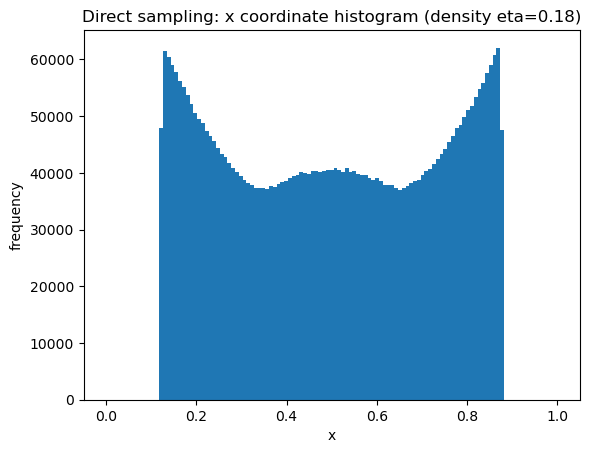

In [128]:
def direct_disks_box(N, sigma):
    overlap = True
    while overlap == True:
        L = [(random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))]
        for k in range(1, N):
            a = (random.uniform(sigma, 1.0 - sigma), random.uniform(sigma, 1.0 - sigma))
            min_dist_sq = min(((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2) for b in L)
            if min_dist_sq < 4.0 * sigma ** 2:
                overlap = True
                break
            else:
                overlap = False
                L.append(a)
    return L


N = 4
sigma = 0.1197
n_runs = 1000000
histo_data = []
for run in range(n_runs):
    pos = direct_disks_box(N, sigma)
    for k in range(N):
        histo_data.append(pos[k][0])
fig, ax = plt.subplots()
ax.hist(histo_data, bins=np.linspace(0, 1, 120))
ax.set_xlabel('x')
ax.set_ylabel('frequency')
ax.set_title('Direct sampling: x coordinate histogram (density eta=0.18)')
fig.savefig('direct_disks_histo.png')


In [131]:
import heapq as hq

In [165]:
h = hq.heapify([])

In [166]:
for i in range(10, 0, -1):
    hq.heappush(h, i)

TypeError: heap argument must be a list

In [162]:
hq.heappop(h)

IndexError: index out of range